In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import  transforms
import seaborn as sns
%matplotlib inline
plt.style.use('default')

cutoff_per = 0.03

names  = !ls all_re_filtered_lensort_OTU_id*.uc
names = names[2:] + ["all_re_filtered_lensort_OTU_id100.uc"]
names

['all_re_filtered_lensort_OTU_id91.uc',
 'all_re_filtered_lensort_OTU_id92.uc',
 'all_re_filtered_lensort_OTU_id93.uc',
 'all_re_filtered_lensort_OTU_id94.uc',
 'all_re_filtered_lensort_OTU_id95.uc',
 'all_re_filtered_lensort_OTU_id96.uc',
 'all_re_filtered_lensort_OTU_id97.uc',
 'all_re_filtered_lensort_OTU_id98.uc',
 'all_re_filtered_lensort_OTU_id99.uc',
 'all_re_filtered_lensort_OTU_id100.uc']

In [121]:
!cat all_re_filtered_lensort_OTU_id91.uc | grep OTU_46

H	45	1250	91.3	+	0	0	56MI183M3I28MI11M5I8M5I34M6I64MI123MD25MI24M3I16MI23M2D54M3I25MD34MI77MI11MI182MI8MI55MD163MD11M29D	Test4-AMFmix-2018_11_742_l1250	OTU_46
H	45	1250	92.1	+	0	0	238M2I31MI20M9I23M5I95MD60MI26MI12MD33MI12M2I26MI28MD49M3I25MD112MI139MD55MI8MI118MD85M2D13MD13M20D	Test4-AMFmix-2018_9_1153_l1250	OTU_46
H	45	1250	92.5	+	0	0	238M2I31MI20M9I23M5I95MD100MD33MI12M2I26MI23M2D54M3I25MD136MI115MD51MI231MD11M19D	Test4-AMFmix-2018_9_529_l1250	OTU_46
H	45	1250	92.4	+	0	0	94MI143M2I31MI20M9I23M5I95MD100MD33MI12M2I26MI23M2D54M3I25MD163MI88MD51MI231MD11M20D	Test4-AMFmix-2018_9_466_l1250	OTU_46
H	45	1250	92.4	+	0	0	238M2I31MI20M9I23M5I200MD25MI15M2I26MI28MD49M3I277MD51MI231MD11M21D	Test4-AMFmix-2018_9_610_l1250	OTU_46
H	45	1250	92.9	+	0	0	45MI13MI108MI71M4I27MI18M5I20MD14M4I91MD69MI35MD26MD15M2I22MI54MI26M3I27M3D180MI69MD55MI8MI218MD11M19D	Test4-AMFmix-2018_9_274_l1250	OTU_46
H	45	1250	92.4	+	0	0	238M2I17MI13MI20M9I23M5I95MD76MI23MD33MI12M2I26MI28MD49M3I25MD252MD51MI231MD11M21D	Test4-AM

# #Function: get OTU count table

In [155]:
def incorfiles(pwd):
    df = pd.read_csv(pwd,header=None,sep="\t")
    df1 = df[df[0]=="H"]
    dft = pd.DataFrame(df1.groupby(9).size())
    dft3 = dft[dft[0] > 2] ##only show OTU with > 2 mapped reads
    dft3[0] = 1
    dft3 = dft3.reset_index()
    df2 = df1.iloc[:,-2:]
    df2[8] = ["_".join(a[0:2]) for a in list(df2[8].str.split("_"))]
    df2[10] = 1
    df3 = pd.DataFrame(df2.groupby([8,9])[10].sum())
    df3 = df3.reset_index()
    dfx = pd.merge(df3,dft3,left_on=9,right_on=9,how="left")
    dfy = dfx[dfx[0] > 0]
    dfy.columns = ["sample ID","OTU ID","count","sth"]
    dfy = dfy.iloc[:,:3]
    dftb = pd.pivot_table(dfy,index="OTU ID",columns="sample ID",values="count")
    return dftb

for name in names[:-2]:
    df = incorfiles(name)
    df.index.name = "#OTU_ID"
    df.columns.name = ""
    df['sort_1'] = [a[1] for a in df.index.str.split("_")]
    df = df.astype(float)
    df = df.sort_values(["sort_1"]).iloc[:,:-1].T
    df['sort'] = [a[1] for a in df.index.str.split("_")]
    df = df.astype(float)
    df = df.sort_values(["sort"])
    df = df.iloc[:,:-1]
    df = df.T.fillna(0)
    df.to_csv(name.replace("all_re_filtered_lensort","usearch").replace(".uc","_count.txt"),sep="\t")
#names[:-2]

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [154]:
df = incorfiles(names[2])
df.index.name = "#OTU_ID"
df.columns.name = ""
df['sort_1'] = [a[1] for a in df.index.str.split("_")]
df = df.astype(float)
df = df.sort_values(["sort_1"]).iloc[:,:-1].T
df['sort'] = [a[1] for a in df.index.str.split("_")]
df = df.astype(float)
df = df.sort_values(["sort"])
df = df.iloc[:,:-1]
df = df.T.fillna(0)
df

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Test4-AMFmix-2018_1,Test4-AMFmix-2018_2,Test4-AMFmix-2018_4,Test4-AMFmix-2018_5,Test4-AMFmix-2018_6,Test4-AMFmix-2018_7,Test4-AMFmix-2018_8,Test4-AMFmix-2018_9,Test4-AMFmix-2018_10,Test4-AMFmix-2018_11,Test4-AMFmix-2018_12,Test4-AMFmix-2018_13
#OTU_ID,,,,,,,,,,,,
OTU_1,0.0,0.0,0.0,0.0,655.0,0.0,0.0,228.0,0.0,43.0,0.0,2.0
OTU_2,690.0,898.0,283.0,1069.0,1.0,5.0,3.0,0.0,0.0,69.0,153.0,254.0
OTU_3,0.0,1.0,0.0,0.0,194.0,0.0,0.0,26.0,0.0,1.0,0.0,0.0
OTU_4,0.0,0.0,1.0,4.0,65.0,238.0,228.0,81.0,283.0,1.0,43.0,35.0
OTU_5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,99.0,190.0,133.0,83.0
OTU_6,645.0,325.0,198.0,390.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,0.0
OTU_7,131.0,116.0,176.0,112.0,1.0,7.0,1.0,36.0,296.0,53.0,175.0,155.0
OTU_8,0.0,1.0,0.0,0.0,5.0,30.0,17.0,24.0,56.0,1.0,7.0,3.0
OTU_9,0.0,0.0,0.0,0.0,24.0,69.0,48.0,11.0,66.0,6.0,7.0,16.0


# #Function:get % tabble

In [4]:
def get_per_tb(pwd):
    df = incorfiles(pwd).T
    #df['sort_1'] = [a[0] for a in df.index.str.split("OTU")]
    df['sort_1'] = [a[1] for a in df.index.str.split("_")]
    df = df.astype(float)
    df = df.sort_values(["sort_1"])
    df = df.iloc[:,:-1].T
    df['sort'] = [a[1] for a in df.index.str.split("_")]
    df = df.astype(float)
    df = df.sort_values(["sort"])
    df = df.iloc[:,:-1]
    df_per = df/df.sum()
    return df_per
get_per_tb(names[0])


/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


sample ID,Test4-AMFmix-2018_1,Test4-AMFmix-2018_2,Test4-AMFmix-2018_4,Test4-AMFmix-2018_5,Test4-AMFmix-2018_6,Test4-AMFmix-2018_7,Test4-AMFmix-2018_8,Test4-AMFmix-2018_9,Test4-AMFmix-2018_10,Test4-AMFmix-2018_11,Test4-AMFmix-2018_12,Test4-AMFmix-2018_13
OTU ID,,,,,,,,,,,,
OTU_1,NaN,NaN,NaN,NaN,0.584289,NaN,NaN,0.184466,NaN,0.060993,NaN,0.002618
OTU_2,0.461638,0.664945,0.428977,0.672181,0.001765,0.007528,0.004918,0.000809,NaN,0.100709,0.255162,0.359948
OTU_3,NaN,0.000738,NaN,NaN,0.176523,NaN,NaN,0.021036,NaN,0.001418,NaN,NaN
OTU_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038835,0.086570,0.270922,0.212389,0.121728
OTU_5,0.424242,0.240590,0.292614,0.251838,NaN,NaN,NaN,0.000809,NaN,0.004255,0.001475,NaN
OTU_6,0.085751,0.085609,0.255682,0.071078,0.000883,0.010038,0.001639,0.029126,0.243528,0.076596,0.268437,0.204188
OTU_7,NaN,0.000738,NaN,NaN,0.004413,0.047679,0.037705,0.019417,0.051780,0.001418,0.011799,0.003927
OTU_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038835,NaN,0.008511,NaN,NaN
OTU_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117314,NaN,0.130496,NaN,NaN


# #Function:get taxon columns

In [66]:
def tax_genus(pwd):
    tax1 = pd.read_csv(pwd,header=None,sep="\t",index_col=0)
    tax1 = pd.DataFrame(tax1.loc[:,1])
    tax1 = tax1[1].str.split(",",expand=True)
    for i in list(tax1.columns):
        tax1[i] = tax1[i].replace(".+unidentified.+",np.nan,regex=True)
    #tax1[tax1[5] == "None"]
    #tax1[tax1[5].isnull()]
    tax1["taxon"] = ""
    for i in tax1.columns[:-2]:
        add_tax = ~tax1.iloc[:,i].isnull()
        tax1.iloc[:,-1][add_tax] = tax1[add_tax].iloc[:,i]
        tax2 = pd.DataFrame(tax1.iloc[:,-1].str.split("(",expand=True)[0])
        tax2.columns = ["taxon"]
    return tax2
tax_genus("all_re_filtered_lensort_OTU_id91_sintax_rm.txt")

,taxon
0,
OTU_9,o:GS24
OTU_7,g:Rhizophagus
OTU_8,c:Sordariomycetes
OTU_4,p:Glomeromycota
OTU_2,g:Rhizophagus
OTU_6,g:Gigaspora
OTU_1,g:Serendipita
OTU_5,g:Diversispora
OTU_10,g:Fusarium


# #Function:get per and taxon table

In [65]:
def get_per_taxon_tb(eachTestID):
    tax = tax_genus(eachTestID.replace(".uc","_sintax_rm.txt"))
    tax.columns = ["taxon_unite"]
    tax_rm_Ug = tax_genus(eachTestID.replace(".uc","_sintax_rm_unidentifiedG.txt"))
    tax_rm_Ug.columns = ["taxon_unite_rmUg"]
    df_per = pd.merge(get_per_tb(eachTestID),tax,left_index=True,right_index=True,how="left")
    df_per = pd.merge(df_per,tax_rm_Ug,left_index=True,right_index=True,how="left")
    #try:
        #del df_per["2nd_1"]
    #except Exception:
        #pass
    #try:
        #del df_per["2nd_14"]
    #except Exception:
        #pass
    
    #df_per.columns = col
    df_per["taxon_unite_rmUg"] = df_per["taxon_unite_rmUg"].str.replace("g:Claroideoglomus","Gc").str.replace("g:Rhizophagus","Ri").str.replace("g:Diversispora","Gv").str.replace("g:Gigaspora","Gigi") #simplify the taxon to Gv, Gigi, Ri and Gc

    return df_per

df_per = get_per_taxon_tb(names[0])
df_per.iloc[:,:-2] = df_per.iloc[:,:-2][df_per.iloc[:,:-2] > 0.01]
df_per = df_per[~df_per.iloc[:,:-2].isnull().all(1)]
#len(df_per.groupby("taxon_unite_rmUg").size())
df_per

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Test4-AMFmix-2018_1,Test4-AMFmix-2018_2,Test4-AMFmix-2018_4,Test4-AMFmix-2018_5,Test4-AMFmix-2018_6,Test4-AMFmix-2018_7,Test4-AMFmix-2018_8,Test4-AMFmix-2018_9,Test4-AMFmix-2018_10,Test4-AMFmix-2018_11,Test4-AMFmix-2018_12,Test4-AMFmix-2018_13,taxon_unite,taxon_unite_rmUg
OTU ID,,,,,,,,,,,,,,
OTU_1,NaN,NaN,NaN,NaN,0.584289,NaN,NaN,0.184466,NaN,0.060993,NaN,NaN,f:Serendipitaceae,f:Serendipitaceae
OTU_2,0.461638,0.664945,0.428977,0.672181,NaN,NaN,NaN,NaN,NaN,0.100709,0.255162,0.359948,f:Glomeraceae,f:Glomeraceae
OTU_3,NaN,NaN,NaN,NaN,0.176523,NaN,NaN,0.021036,NaN,NaN,NaN,NaN,f:Halosphaeriaceae,f:Periconiaceae
OTU_4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038835,0.086570,0.270922,0.212389,0.121728,NaN,f:Glomeraceae
OTU_5,0.424242,0.240590,0.292614,0.251838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f:Diversisporaceae,f:Diversisporaceae
OTU_6,0.085751,0.085609,0.255682,0.071078,NaN,0.010038,NaN,0.029126,0.243528,0.076596,0.268437,0.204188,f:Gigasporaceae,f:Gigasporaceae
OTU_7,NaN,NaN,NaN,NaN,NaN,0.047679,0.037705,0.019417,0.051780,NaN,0.011799,NaN,f:Glomeraceae,f:Glomeraceae
OTU_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038835,NaN,NaN,NaN,NaN,NaN,f:Magnaporthaceae
OTU_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117314,NaN,0.130496,NaN,NaN,NaN,f:Claroideoglomeraceae


# #Function: plot_known_samples

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


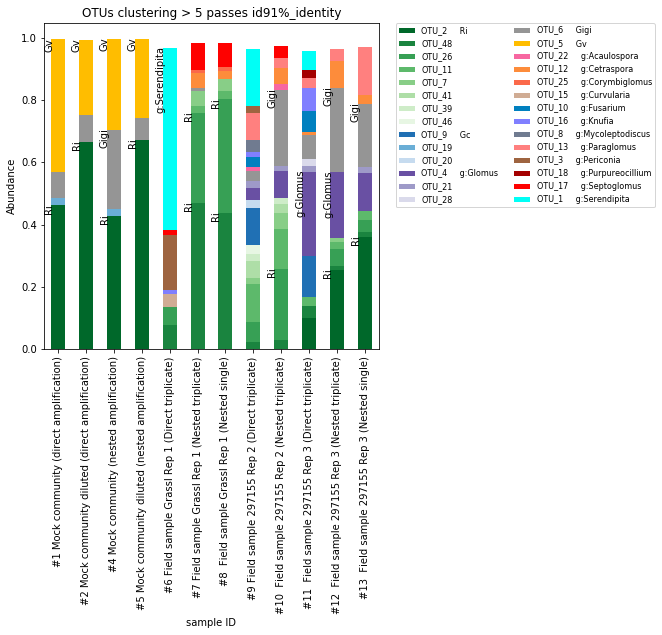

In [30]:
col_known = ["#1 Mock community (direct amplification)",
    "#2 Mock community diluted (direct amplification)",
    "#4 Mock community (nested amplification)",
    "#5 Mock community diluted (nested amplification)",
    "#6 Field sample Grassl Rep 1 (Direct triplicate)",
    "#7 Field sample Grassl Rep 1 (Nested triplicate)",
    "#8  Field sample Grassl Rep 1 (Nested single)",
    "#9 Field sample 297155 Rep 2 (Direct triplicate)",
    "#10  Field sample 297155 Rep 2 (Nested triplicate)",
    "#11  Field sample 297155 Rep 3 (Direct triplicate)",
    "#12  Field sample 297155 Rep 3 (Nested triplicate)",
    "#13  Field sample 297155 Rep 3 (Nested single)",
    "taxon_unite","taxon_unite_rmUg"]
##ncol legend col
def plot_known_samples(eachTestID,ncol):
    df = get_per_taxon_tb(eachTestID)
    df.columns = col_known
    df = df.sort_values(["taxon_unite_rmUg","taxon_unite"]) ## sort using taxon
    ## remove < 1%
    df.iloc[:,:-2] = df.iloc[:,:-2][df.iloc[:,:-2] > 0.01]
    df = df[~df.iloc[:,:-2].isnull().all(1)]
    
    df["sort_per"] = df.iloc[:,:-2].sum(1)
    dfcount = df.groupby("taxon_unite_rmUg").size()
    dfcount = pd.DataFrame(dfcount)
    dfcount.columns = ["genus_count"]
    df = pd.merge(df,dfcount,left_on="taxon_unite_rmUg",right_index=True,how="left")
    df = df.sort_values(["genus_count","taxon_unite_rmUg","sort_per"],ascending=[False, True,False])
    df =df.iloc[:,:-2]
    ## each genus have a unqiue main color
    len(df["taxon_unite_rmUg"].unique())
    color_list = ["Greens","Blues","Purples","Greys","Wistia","RdPu","Oranges","Reds","pink","winter","cool","bone","spring","copper","flag","brg","hsv","gnuplot"] ## main color
    genus = df["taxon_unite_rmUg"].unique()
    
    ## set gradient color for each genus
    df["color"] = "" ## generate one column for color
    for i in np.arange(len(genus)):
        dft = df[df["taxon_unite_rmUg"] == genus[i]]
        mycolor = sns.color_palette(color_list[i], len(dft["taxon_unite_rmUg"])).as_hex()
        df.loc[df["taxon_unite_rmUg"] == genus[i],"color"] = list(reversed(mycolor))    
    
    
    ## change index to fit plt legend
    topind = df.drop_duplicates(subset='taxon_unite_rmUg').index
    topind_num = list(df.reset_index().drop_duplicates(subset='taxon_unite_rmUg').index)
    #df.loc[topind].index = df.loc[topind].index +"\t"+ df.loc[topind,"taxon_unite_rmUg"] 
    dft = df.reset_index()
    dft.loc[topind_num,"OTU ID"] = df.loc[topind].index +"     "+ df.loc[topind,"taxon_unite_rmUg"]
    df = dft.set_index("OTU ID")
    
    
    df.iloc[:,:-3].T.plot(kind='bar', stacked=True,colors=df["color"],figsize=(6,6))
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,prop={'size': 8},ncol=ncol)
    plt.xticks(rotation=90)
    plt.xlabel('sample ID')
    plt.ylabel('Abundance')
    #plt.plot( [4.5,4.5],[0,1.02],linestyle='-',color='k')
    #plt.text(4.8, 1.01, "2nd PacBio run") 
    #plt.text(1, 1.01, "1st PacBio run") 
    for j in np.arange(0,12):
        dft = df.iloc[:,[j,-2]].dropna()
        a = list(dft.iloc[:,0])
        b =[]
        dft1 = dft.copy()
        for i in np.arange(1,len(a)+1):
            b.append(sum(a[:i]))
        dft1.iloc[:,0] = b
        #dft.set_index('taxon_rm_UG')
        ind = list(dft[dft.iloc[:,0] > 0.2].index)
        dft2 = dft1.loc[ind,:]
        for y, label in zip(list(dft2.iloc[:,0]),list(dft2.iloc[:,1])):
            plt.text(j-0.5, y-0.02, label,fontsize=10,rotation='vertical')
    plt.title("OTUs clustering > 5 passes " + eachTestID.replace(".uc","%_identity").replace("all_re_filtered_lensort_OTU_",""))
    transforms.Affine2D().rotate_deg(90)
    plt.savefig(eachTestID.replace("all_re_filtered_lensort_OTU_","usearch_clustering_").replace(".uc","") + "_plot.png", bbox_inches='tight')
    return plt.show()
plot_known_samples(names[0],2)

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


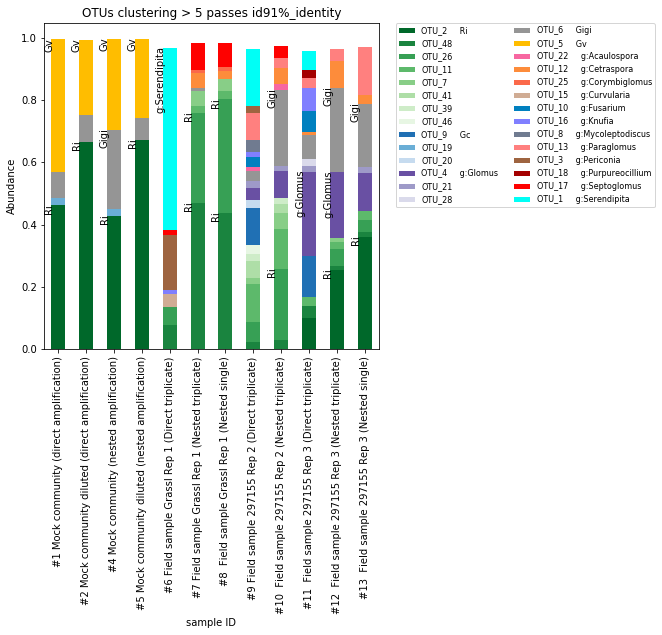

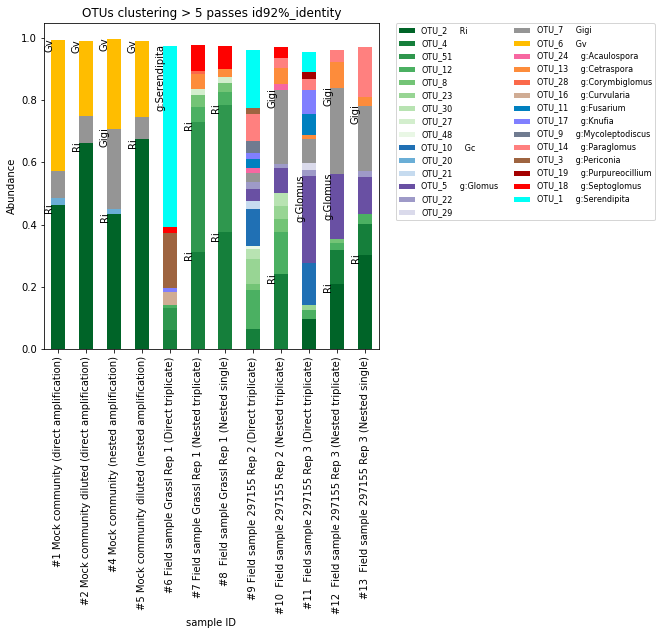

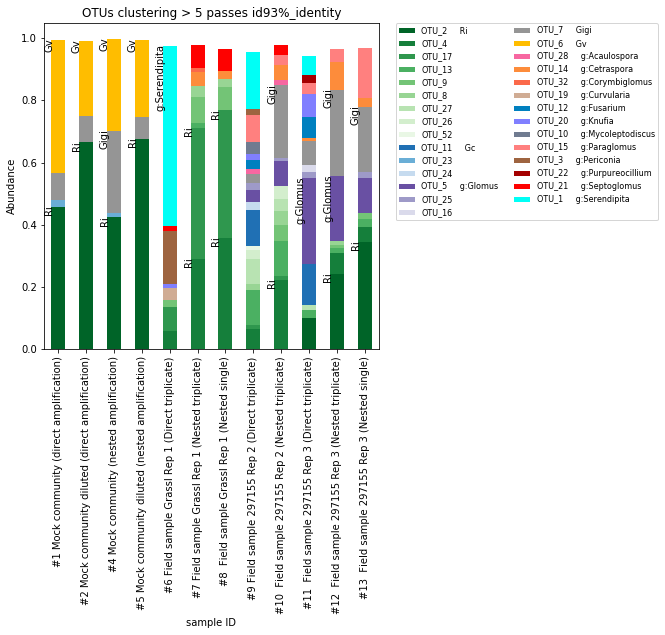

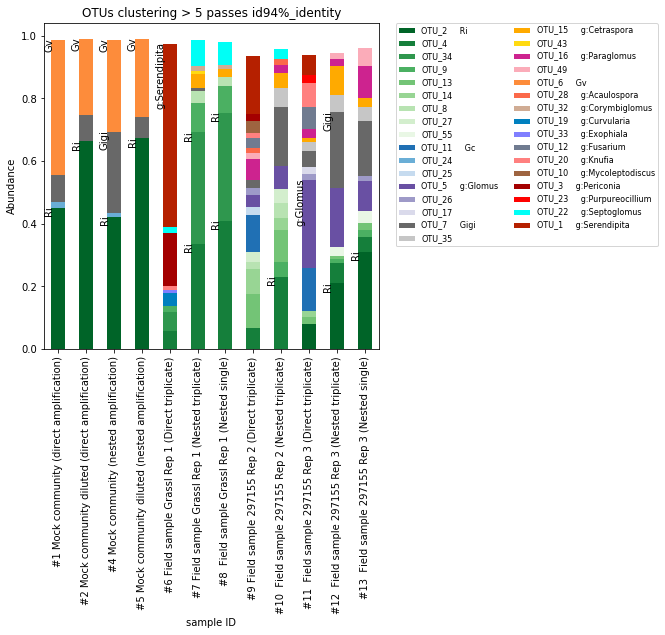

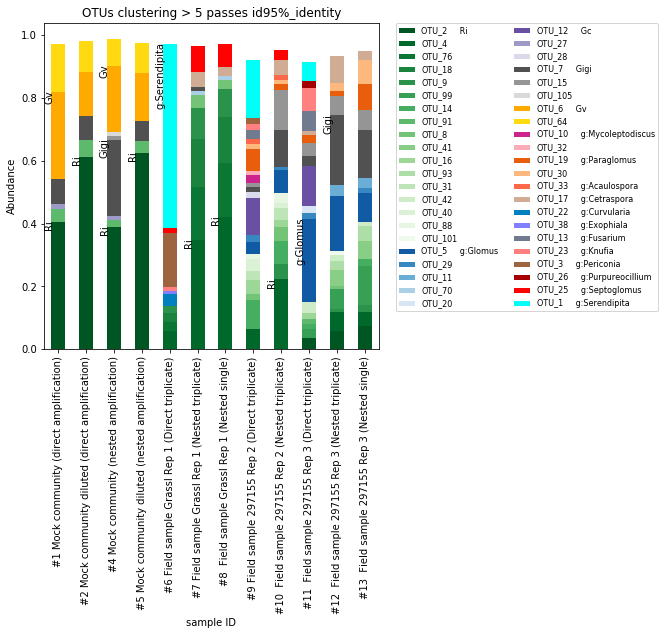

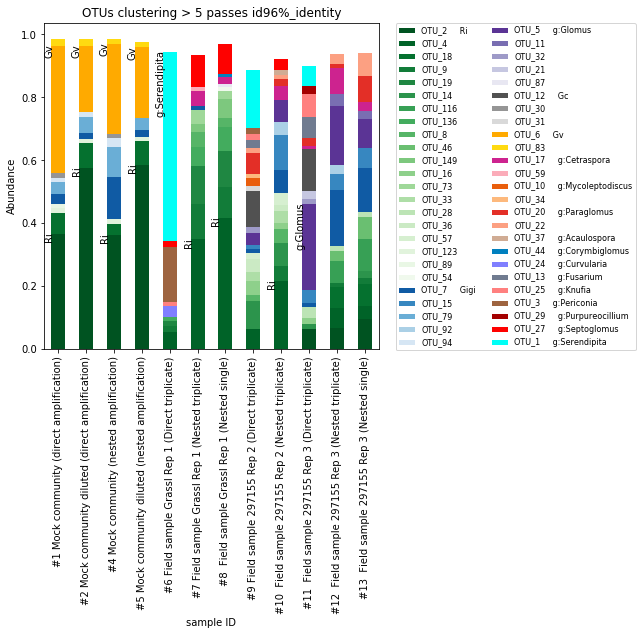

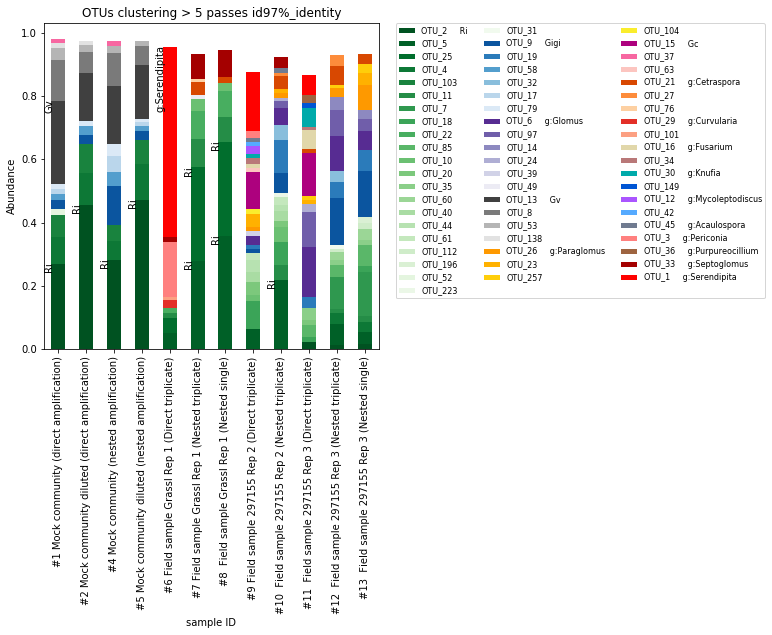

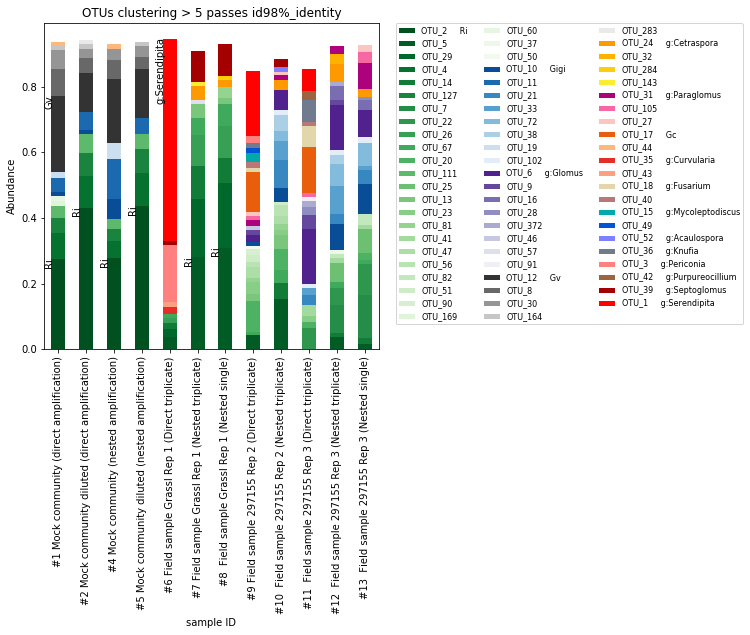

In [31]:
plot_known_samples(names[0],2)
plot_known_samples(names[1],2)
plot_known_samples(names[2],2)
plot_known_samples(names[3],2)
plot_known_samples(names[4],2)
plot_known_samples(names[5],2)
plot_known_samples(names[6],3)
plot_known_samples(names[7],3)

## pecentage of AMF fungi in each sample

In [119]:
def tax_genus2(pwd):
    tax1 = pd.read_csv(pwd,header=None,sep="\t",index_col=0)
    tax1 = pd.DataFrame(tax1.loc[:,1])
    tax1 = tax1[1].str.split(",",expand=True)
    for i in list(tax1.columns):
        tax1[i] = tax1[i].replace(".+unidentified.+",np.nan,regex=True)
    #tax1[tax1[5] == "None"]
    #tax1[tax1[5].isnull()]
    #tax1["taxon"] = ""
    tax2 = pd.DataFrame(tax1[1].str.replace("\(.*\)",""))
    tax2.columns = ["taxon"]

    #for i in tax1.columns[:-2]:
        #add_tax = ~tax1.iloc[:,i].isnull()
        #tax1.iloc[:,-1][add_tax] = tax1[add_tax].iloc[:,i]
        #tax2 = pd.DataFrame(tax1.iloc[:,-1].str.split("(",expand=True)[0])
        #tax2.columns = ["taxon"]
    return tax2
def get_per_taxon_tb(eachTestID):
    tax = tax_genus(eachTestID.replace(".uc","_sintax_rm.txt"))
    tax.columns = ["taxon_unite"]
    tax_rm_Ug = tax_genus2(eachTestID.replace(".uc","_sintax_rm_unidentifiedG.txt"))
    tax_rm_Ug.columns = ["taxon_unite_rmUg"]
    df_per = pd.merge(get_per_tb(eachTestID),tax,left_index=True,right_index=True,how="left")
    df_per = pd.merge(df_per,tax_rm_Ug,left_index=True,right_index=True,how="left")
    #try:
        #del df_per["2nd_1"]
    #except Exception:
        #pass
    #try:
        #del df_per["2nd_14"]
    #except Exception:
        #pass
    
    #df_per.columns = col
    df_per["taxon_unite_rmUg"] = df_per["taxon_unite_rmUg"].str.replace("g:Claroideoglomus","Gc").str.replace("g:Rhizophagus","Ri").str.replace("g:Diversispora","Gv").str.replace("g:Gigaspora","Gigi") #simplify the taxon to Gv, Gigi, Ri and Gc

    return df_per
def phylum_per(name):
    df_per = get_per_taxon_tb(name)
    sample_list = df_per.columns[:-2]
    df_fam = df_per.groupby("taxon_unite_rmUg")[sample_list].sum()
    dft = pd.DataFrame(df_fam.loc["p:Glomeromycota"])
    return dft
dft = phylum_per(names[-3])
for name in names[1:-2]:
    dft = pd.merge(dft,phylum_per(name),left_index=True,right_index=True)
dft.columns = ["cluster_" + a.replace("all_re_filtered_lensort_OTU_","").replace(".uc","") for a in names[0:-2]]
dft.index = col_known[:-2]
dft

/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cluster_id91,cluster_id92,cluster_id93,cluster_id94,cluster_id95,cluster_id96,cluster_id97,cluster_id98
#1 Mock community (direct amplification),0.994404,0.994781,0.994695,0.994598,0.994562,0.995070,0.994764,0.994404
#2 Mock community diluted (direct amplification),0.991770,0.991876,0.991858,0.991852,0.991822,0.991679,0.990998,0.991770
#4 Mock community (nested amplification),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
#5 Mock community diluted (nested amplification),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
#6 Field sample Grassl Rep 1 (Direct triplicate),0.135838,0.173759,0.187665,0.168157,0.168165,0.148011,0.163586,0.135838
#7 Field sample Grassl Rep 1 (Nested triplicate),0.997543,0.998758,0.998786,0.998559,0.998384,0.998062,0.998182,0.997543
#8 Field sample Grassl Rep 1 (Nested single),0.993421,0.996753,0.996855,0.996303,0.995876,0.994832,0.995215,0.993421
#9 Field sample 297155 Rep 2 (Direct triplicate),0.653646,0.694175,0.694669,0.685504,0.688498,0.679291,0.674056,0.653646
#10 Field sample 297155 Rep 2 (Nested triplicate),0.993644,1.000000,1.000000,1.000000,1.000000,0.997250,0.995910,0.993644
#11 Field sample 297155 Rep 3 (Direct triplicate),0.723810,0.750365,0.744928,0.738872,0.751404,0.741983,0.735207,0.723810
